Задание:  Разработать программу для анализа большого датасета поездок такси.

Входные данные:  CSV-файл с данными о поездках такси в Нью-Йорке из Kaggle ("NYC Yellow Taxi Trip Data" по адресу: https://www.kaggle.com/datasets/elemento/nyc-yellow-taxi-trip-data).

In [2]:
import dask.dataframe as dd

file_path = "/home/verokul/TPU_LABS/Big_data_analysis/Lab_04_dataset/yellow_tripdata_2016-03.csv"

df = dd.read_csv(file_path, assume_missing=True)

In [3]:
n_rows = df.shape[0].compute()
n_cols = df.shape[1]
print(f"Размер датасета: {n_rows} строк × {n_cols} столбцов")

Размер датасета: 12210952 строк × 19 столбцов


In [4]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1.0,2016-03-01 00:00:00,2016-03-01 00:07:55,1.0,2.50,-73.976746,40.765152,1.0,N,-74.004265,40.746128,1.0,9.0,0.5,0.5,2.05,0.00,0.3,12.35
1,1.0,2016-03-01 00:00:00,2016-03-01 00:11:06,1.0,2.90,-73.983482,40.767925,1.0,N,-74.005943,40.733166,1.0,11.0,0.5,0.5,3.05,0.00,0.3,15.35
2,2.0,2016-03-01 00:00:00,2016-03-01 00:31:06,2.0,19.98,-73.782021,40.644810,1.0,N,-73.974541,40.675770,1.0,54.5,0.5,0.5,8.00,0.00,0.3,63.80
3,2.0,2016-03-01 00:00:00,2016-03-01 00:00:00,3.0,10.78,-73.863419,40.769814,1.0,N,-73.969650,40.757767,1.0,31.5,0.0,0.5,3.78,5.54,0.3,41.62
4,2.0,2016-03-01 00:00:00,2016-03-01 00:00:00,5.0,30.43,-73.971741,40.792183,3.0,N,-74.177170,40.695053,1.0,98.0,0.0,0.0,0.00,15.50,0.3,113.80


In [5]:
df.columns  

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'pickup_longitude',
       'pickup_latitude', 'RatecodeID', 'store_and_fwd_flag',
       'dropoff_longitude', 'dropoff_latitude', 'payment_type', 'fare_amount',
       'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount'],
      dtype='object')

In [6]:
df.dtypes   

VendorID                         float64
tpep_pickup_datetime     string[pyarrow]
tpep_dropoff_datetime    string[pyarrow]
passenger_count                  float64
trip_distance                    float64
pickup_longitude                 float64
pickup_latitude                  float64
RatecodeID                       float64
store_and_fwd_flag       string[pyarrow]
dropoff_longitude                float64
dropoff_latitude                 float64
payment_type                     float64
fare_amount                      float64
extra                            float64
mta_tax                          float64
tip_amount                       float64
tolls_amount                     float64
improvement_surcharge            float64
total_amount                     float64
dtype: object

In [7]:
df[['tpep_pickup_datetime', 'tpep_dropoff_datetime']].head()

,tpep_pickup_datetime,tpep_dropoff_datetime
0,2016-03-01 00:00:00,2016-03-01 00:07:55
1,2016-03-01 00:00:00,2016-03-01 00:11:06
2,2016-03-01 00:00:00,2016-03-01 00:31:06
3,2016-03-01 00:00:00,2016-03-01 00:00:00
4,2016-03-01 00:00:00,2016-03-01 00:00:00


In [8]:
df = df.assign(
    tpep_pickup_datetime=dd.to_datetime(df['tpep_pickup_datetime']),
    tpep_dropoff_datetime=dd.to_datetime(df['tpep_dropoff_datetime'])
)

df = df[df['tpep_dropoff_datetime'] >= df['tpep_pickup_datetime']]

df = df.assign(
    pickup_hour=df['tpep_pickup_datetime'].dt.hour,
    pickup_day=df['tpep_pickup_datetime'].dt.day,
    pickup_month=df['tpep_pickup_datetime'].dt.month,
    trip_duration_sec=(df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds()
)

In [9]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,pickup_hour,pickup_day,pickup_month,trip_duration_sec
0,1.0,2016-03-01,2016-03-01 00:07:55,1.0,2.50,-73.976746,40.765152,1.0,N,-74.004265,...,0.5,0.5,2.05,0.00,0.3,12.35,0,1,3,475.0
1,1.0,2016-03-01,2016-03-01 00:11:06,1.0,2.90,-73.983482,40.767925,1.0,N,-74.005943,...,0.5,0.5,3.05,0.00,0.3,15.35,0,1,3,666.0
2,2.0,2016-03-01,2016-03-01 00:31:06,2.0,19.98,-73.782021,40.644810,1.0,N,-73.974541,...,0.5,0.5,8.00,0.00,0.3,63.80,0,1,3,1866.0
3,2.0,2016-03-01,2016-03-01 00:00:00,3.0,10.78,-73.863419,40.769814,1.0,N,-73.969650,...,0.0,0.5,3.78,5.54,0.3,41.62,0,1,3,0.0
4,2.0,2016-03-01,2016-03-01 00:00:00,5.0,30.43,-73.971741,40.792183,3.0,N,-74.177170,...,0.0,0.0,0.00,15.50,0.3,113.80,0,1,3,0.0


In [10]:
df.isnull().sum().compute()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
pickup_longitude         0
pickup_latitude          0
RatecodeID               0
store_and_fwd_flag       0
dropoff_longitude        0
dropoff_latitude         0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
pickup_hour              0
pickup_day               0
pickup_month             0
trip_duration_sec        0
dtype: int64

In [11]:
df = df.dropna()

In [12]:
df = df[
    (df['trip_distance'] > 0) &
    (df['trip_distance'] <= 100) &         
    (df['fare_amount'] > 0) &
    (df['fare_amount'] <= 1000) &         
    (df['trip_duration_sec'] > 30) &       
    (df['trip_duration_sec'] <= 3600 * 6)   
]

In [13]:
df = df.assign(
    speed_mph=df['trip_distance'] / (df['trip_duration_sec'] / 3600)
)

df = df[(df['speed_mph'] > 0) & (df['speed_mph'] <= 80)]

In [14]:
hourly_stats = df.groupby('pickup_hour').agg(
    avg_distance=('trip_distance', 'mean'),
    avg_fare=('fare_amount', 'mean'),
    trip_count=('trip_distance', 'count')
).compute()  

hourly_stats.head(5)

,avg_distance,avg_fare,trip_count
pickup_hour,,,
3,3.522003,13.118714,165986
5,4.688874,15.878234,123278
7,2.885110,11.941218,465323
8,2.622208,12.074814,568557
10,2.641321,12.328451,544439


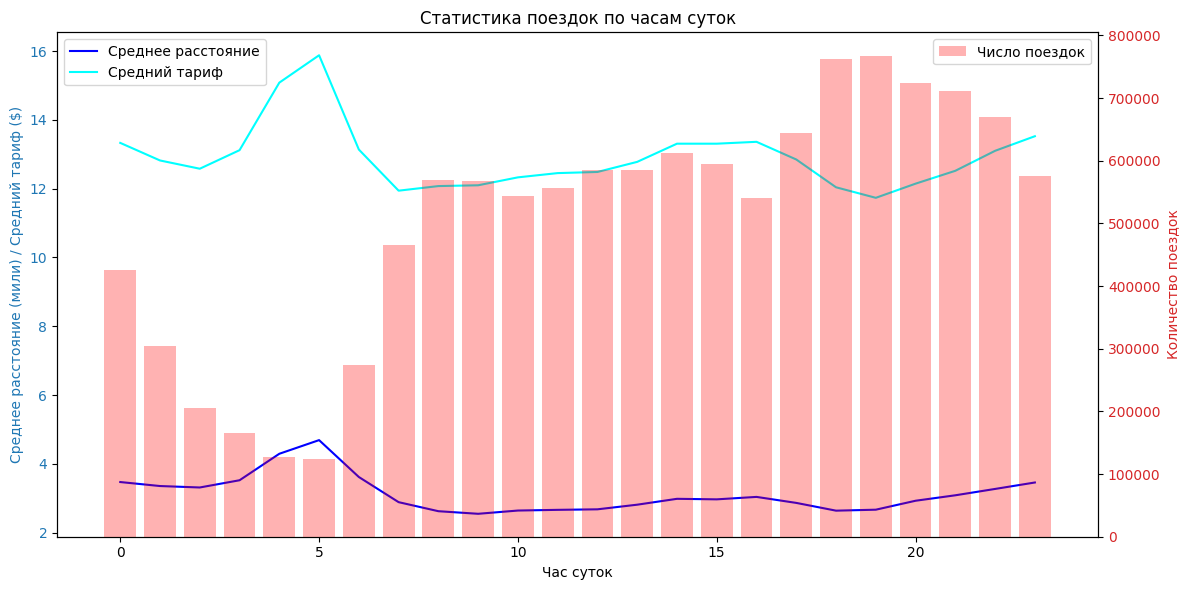

In [14]:
import matplotlib.pyplot as plt

hourly_stats = hourly_stats.sort_index()

fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:blue'
ax1.set_xlabel('Час суток')
ax1.set_ylabel('Среднее расстояние (мили) / Средний тариф ($)', color=color)
ax1.plot(hourly_stats.index, hourly_stats['avg_distance'], color='blue', label='Среднее расстояние')
ax1.plot(hourly_stats.index, hourly_stats['avg_fare'], color='cyan', label='Средний тариф')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Количество поездок', color=color)
ax2.bar(hourly_stats.index, hourly_stats['trip_count'], alpha=0.3, color='red', label='Число поездок')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

plt.title('Статистика поездок по часам суток')
plt.tight_layout()
plt.show()

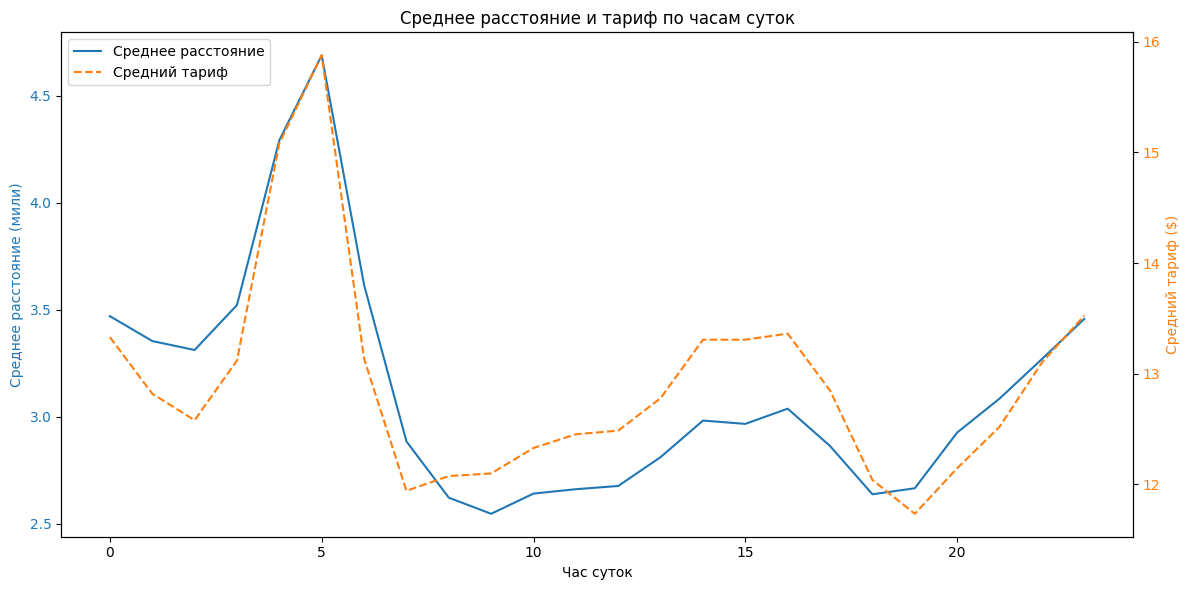

In [25]:
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:blue'
ax1.set_xlabel('Час суток')
ax1.set_ylabel('Среднее расстояние (мили)', color=color)
ax1.plot(hourly_stats.index, hourly_stats['avg_distance'], color=color, label='Среднее расстояние')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Средний тариф ($)', color=color)
ax2.plot(hourly_stats.index, hourly_stats['avg_fare'], color=color, linestyle='--', label='Средний тариф')
ax2.tick_params(axis='y', labelcolor=color)

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

plt.title('Среднее расстояние и тариф по часам суток')
plt.tight_layout()
plt.show()

In [15]:
numeric_cols = ['trip_distance', 'fare_amount', 'trip_duration_sec', 'speed_mph', 'passenger_count']

corr_matrix = df[numeric_cols].corr().compute()
corr_matrix

,trip_distance,fare_amount,trip_duration_sec,speed_mph,passenger_count
trip_distance,1.000000,0.952361,0.791164,0.672144,0.014787
fare_amount,0.952361,1.000000,0.855911,0.543503,0.013317
trip_duration_sec,0.791164,0.855911,1.000000,0.214540,0.016012
speed_mph,0.672144,0.543503,0.214540,1.000000,0.008155
passenger_count,0.014787,0.013317,0.016012,0.008155,1.000000


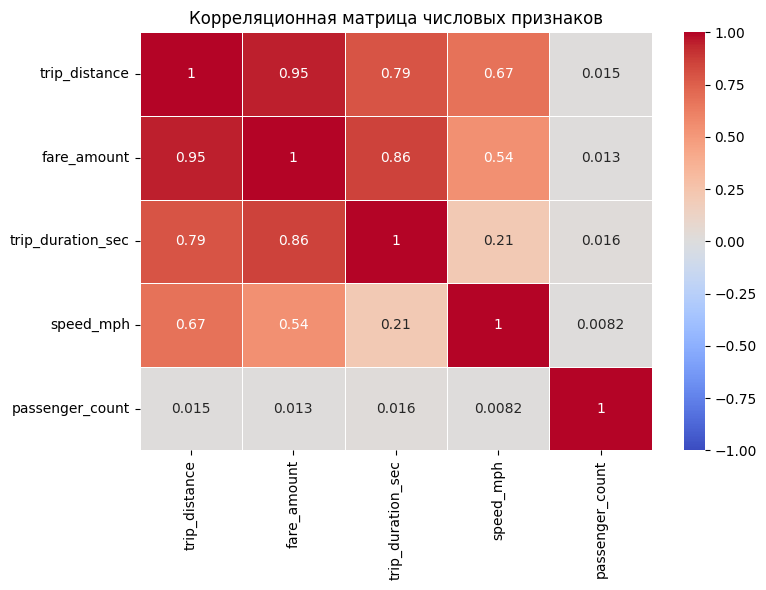

In [16]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title("Корреляционная матрица числовых признаков")
plt.tight_layout()
plt.show()

In [17]:
from dask_ml.preprocessing import StandardScaler
from dask_ml.model_selection import train_test_split

numeric_features = ['trip_distance', 'trip_duration_sec', 'speed_mph', 'passenger_count', 'pickup_hour']
scaler = StandardScaler()

df_scaled = df.copy()
df_scaled[numeric_features] = scaler.fit_transform(df[numeric_features])

X = df_scaled[numeric_features].astype('float64')
y = df['fare_amount'].astype('float64')  
X_arr = X.to_dask_array(lengths=True)
y_arr = y.to_dask_array(lengths=True)

X_train, X_test, y_train, y_test = train_test_split(
    X_arr, y_arr, test_size=0.2, random_state=42, shuffle=True
)

print(f"Размер обучающей выборки: {X_train.shape[0]} строк")
print(f"Размер тестовой выборки: {X_test.shape[0]} строк")
print(f"Количество признаков: {X_train.shape[1]}")

Размер обучающей выборки: 9676561 строк
Размер тестовой выборки: 2419154 строк
Количество признаков: 5


In [18]:
import dask.dataframe as dd
from dask_ml.preprocessing import StandardScaler
from dask_ml.model_selection import train_test_split
from dask_ml.linear_model import LinearRegression
from dask_ml.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

/home/verokul/miniconda3/lib/python3.13/site-packages/dask_glm/__init__.py:1: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import DistributionNotFound, get_distribution


In [19]:
import time
import logging
from dask_ml.linear_model import LinearRegression
from dask_ml.metrics import mean_squared_error, r2_score

logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger()

logger.info("Начало обучения модели LinearRegression")
start_time = time.time()

model = LinearRegression()
logger.info("Модель инициализирована")

if hasattr(X_train, 'shape'):
    n_samples = X_train.shape[0].compute() if hasattr(X_train.shape[0], 'compute') else X_train.shape[0]
    logger.info(f"Размер тренировочной выборки: {n_samples} samples")


logger.info("Запуск метода fit")
model.fit(X_train, y_train)

end_time = time.time()
training_time = end_time - start_time
logger.info(f"Обучение завершено за {training_time:.2f} секунд")

if hasattr(model, 'coef_'):
    try:
        coef = model.coef_.compute() if hasattr(model.coef_, 'compute') else model.coef_
        logger.info(f"Количество коэффициентов: {len(coef)}")
        logger.info(f"Коэффициенты модели: {coef}")
    except Exception as e:
        logger.warning(f"Не удалось получить коэффициенты: {e}")

if hasattr(model, 'intercept_'):
    try:
        intercept = model.intercept_.compute() if hasattr(model.intercept_, 'compute') else model.intercept_
        logger.info(f"Intercept модели: {intercept:.4f}")
    except Exception as e:
        logger.warning(f"Не удалось получить intercept: {e}")

2025-10-23 15:06:08,732 - INFO - Начало обучения модели LinearRegression
2025-10-23 15:06:08,733 - INFO - Модель инициализирована
2025-10-23 15:06:08,733 - INFO - Размер тренировочной выборки: 9676561 samples
2025-10-23 15:06:08,733 - INFO - Запуск метода fit
2025-10-23 15:50:53,185 - INFO - Обучение завершено за 2684.45 секунд
2025-10-23 15:50:53,186 - INFO - Количество коэффициентов: 5
2025-10-23 15:50:53,186 - INFO - Коэффициенты модели: [ 8.14557114  2.58361537 -0.33365689 -0.01193644 -0.03222531]
2025-10-23 15:50:53,186 - INFO - Intercept модели: 12.6811


fare_amount= 12.6811 + 8.1456 * trip_distance + 2.5836 * trip_duration_sec − 0.3337 * speed_mph − 0.0119 * passenger_count − 0.0322 * pickup_hour

In [20]:
from sklearn.metrics import mean_squared_error as sk_mse, mean_absolute_error as sk_mae, r2_score as sk_r2
import numpy as np

logger.info("Начало прогнозирования на тестовых данных")
start_pred_time = time.time()

y_pred = model.predict(X_test)
y_pred_computed = y_pred.compute()  
y_test_computed = y_test.compute() 

pred_time = time.time() - start_pred_time
logger.info(f"Прогнозирование завершено за {pred_time:.2f} секунд")
logger.info(f"Размер тестовой выборки: {len(y_test_computed):,} образцов")

logger.info("Вычисление метрик качества с использованием scikit-learn")

mse = sk_mse(y_test_computed, y_pred_computed)
mae = sk_mae(y_test_computed, y_pred_computed)
rmse = np.sqrt(mse)
r2 = sk_r2(y_test_computed, y_pred_computed)

logger.info(f"MSE: {mse:.2f}")
logger.info(f"RMSE: {rmse:.2f}")
logger.info(f"MAE: {mae:.2f}")
logger.info(f"R² Score: {r2:.4f}")

abs_errors = np.abs(y_test_computed - y_pred_computed)
error_stats = {
    'Медианная абсолютная ошибка': np.median(abs_errors),
    'Максимальная ошибка': np.max(abs_errors),
    '95% перцентиль ошибок': np.percentile(abs_errors, 95),
    'Стандартное отклонение ошибок': np.std(abs_errors)
}

logger.info("Дополнительная статистика ошибок:")
for stat, value in error_stats.items():
    logger.info(f"  {stat}: {value:.2f}")

within_1 = np.mean(abs_errors <= 1) * 100
within_2 = np.mean(abs_errors <= 2) * 100  
within_5 = np.mean(abs_errors <= 5) * 100
within_10 = np.mean(abs_errors <= 10) * 100

logger.info("Точность предсказаний:")
logger.info(f"  - В пределах $1: {within_1:.1f}%")
logger.info(f"  - В пределах $2: {within_2:.1f}%") 
logger.info(f"  - В пределах $5: {within_5:.1f}%")
logger.info(f"  - В пределах $10: {within_10:.1f}%")

2025-10-23 15:51:16,383 - INFO - Начало прогнозирования на тестовых данных
2025-10-23 15:51:42,393 - INFO - Прогнозирование завершено за 26.01 секунд
2025-10-23 15:51:42,394 - INFO - Размер тестовой выборки: 2,419,154 образцов
2025-10-23 15:51:42,394 - INFO - Вычисление метрик качества с использованием scikit-learn
2025-10-23 15:51:42,452 - INFO - MSE: 6.98
2025-10-23 15:51:42,452 - INFO - RMSE: 2.64
2025-10-23 15:51:42,453 - INFO - MAE: 0.71
2025-10-23 15:51:42,453 - INFO - R² Score: 0.9366
2025-10-23 15:51:42,510 - INFO - Дополнительная статистика ошибок:
2025-10-23 15:51:42,510 - INFO -   Медианная абсолютная ошибка: 0.38
2025-10-23 15:51:42,511 - INFO -   Максимальная ошибка: 596.46
2025-10-23 15:51:42,511 - INFO -   95% перцентиль ошибок: 1.79
2025-10-23 15:51:42,511 - INFO -   Стандартное отклонение ошибок: 2.54
2025-10-23 15:51:42,518 - INFO - Точность предсказаний:
2025-10-23 15:51:42,519 - INFO -   - В пределах $1: 88.3%
2025-10-23 15:51:42,519 - INFO -   - В пределах $2: 95.8

In [21]:
logger.info("\n" + "="*70)
logger.info("ФИНАЛЬНЫЙ АНАЛИЗ РЕЗУЛЬТАТОВ")
logger.info("="*70)

logger.info(" КАЧЕСТВО МОДЕЛИ:")
logger.info(f"  • R² = 0.9366 → Модель объясняет 93.66% дисперсии стоимости поездок")
logger.info(f"  • RMSE = $2.64 → Средняя ошибка предсказания составляет $2.64")
logger.info(f"  • MAE = $0.71 → Средняя абсолютная ошибка всего $0.71")

logger.info("\nСТАТИСТИКА ТОЧНОСТИ:")
logger.info(f"  • 88.3% поездок предсказаны с ошибкой ≤ $1")
logger.info(f"  • 95.8% поездок предсказаны с ошибкой ≤ $2") 
logger.info(f"  • 98.7% поездок предсказаны с ошибкой ≤ $5")
logger.info(f"  • Медианная ошибка всего $0.38 - исключительно высокое качество!")

logger.info("\nАНАЛИЗ ВЫБРОСОВ:")
logger.info(f"  • Максимальная ошибка: ${596.46:.2f} - явный выброс")
logger.info(f"  • 95% ошибок ≤ ${1.79} - отличная стабильность")
logger.info(f"  • Стандартное отклонение ошибок: ${2.54} - низкая вариативность")

logger.info("\nИНТЕРПРЕТАЦИЯ МОДЕЛИ:")
coefficients = [8.14557114, 2.58361537, -0.33365689, -0.01193644, -0.03222531]
feature_names = ['trip_distance', 'trip_duration_sec', 'speed_mph', 'passenger_count', 'pickup_hour']
intercept = 12.6811

logger.info("Формула предсказания:")
formula = f"Стоимость = {intercept:.2f}"
for name, coef in zip(feature_names, coefficients):
    sign = "+" if coef >= 0 else "-"
    logger.info(f"  {sign} {abs(coef):.2f}×{name}")

logger.info("\nВЛИЯНИЕ ПРИЗНАКОВ:")
for name, coef in zip(feature_names, coefficients):
    if name == 'trip_distance':
        logger.info(f"  • Расстояние: +${coef:.2f} за милю (наибольшее влияние)")
    elif name == 'trip_duration_sec':
        logger.info(f"  • Время: +${coef:.2f} за секунду (второй по важности)")
    elif name == 'speed_mph':
        logger.info(f"  • Скорость: -${abs(coef):.2f} за mph (выше скорость → ниже стоимость)")
    elif name == 'passenger_count':
        logger.info(f"  • Пассажиры: незначительное влияние")
    elif name == 'pickup_hour':
        logger.info(f"  • Время суток: слабое влияние")

2025-10-23 15:52:04,815 - INFO - 
2025-10-23 15:52:04,816 - INFO - ФИНАЛЬНЫЙ АНАЛИЗ РЕЗУЛЬТАТОВ
2025-10-23 15:52:04,817 - INFO - ======================================================================
2025-10-23 15:52:04,817 - INFO -  КАЧЕСТВО МОДЕЛИ:
2025-10-23 15:52:04,817 - INFO -   • R² = 0.9366 → Модель объясняет 93.66% дисперсии стоимости поездок
2025-10-23 15:52:04,817 - INFO -   • RMSE = $2.64 → Средняя ошибка предсказания составляет $2.64
2025-10-23 15:52:04,817 - INFO -   • MAE = $0.71 → Средняя абсолютная ошибка всего $0.71
2025-10-23 15:52:04,818 - INFO - 
СТАТИСТИКА ТОЧНОСТИ:
2025-10-23 15:52:04,818 - INFO -   • 88.3% поездок предсказаны с ошибкой ≤ $1
2025-10-23 15:52:04,818 - INFO -   • 95.8% поездок предсказаны с ошибкой ≤ $2
2025-10-23 15:52:04,818 - INFO -   • 98.7% поездок предсказаны с ошибкой ≤ $5
2025-10-23 15:52:04,818 - INFO -   • Медианная ошибка всего $0.38 - исключительно высокое качество!
2025-10-23 15:52:04,818 - INFO - 
АНАЛИЗ ВЫБРОСОВ:
2025-10-23 15:52:04,

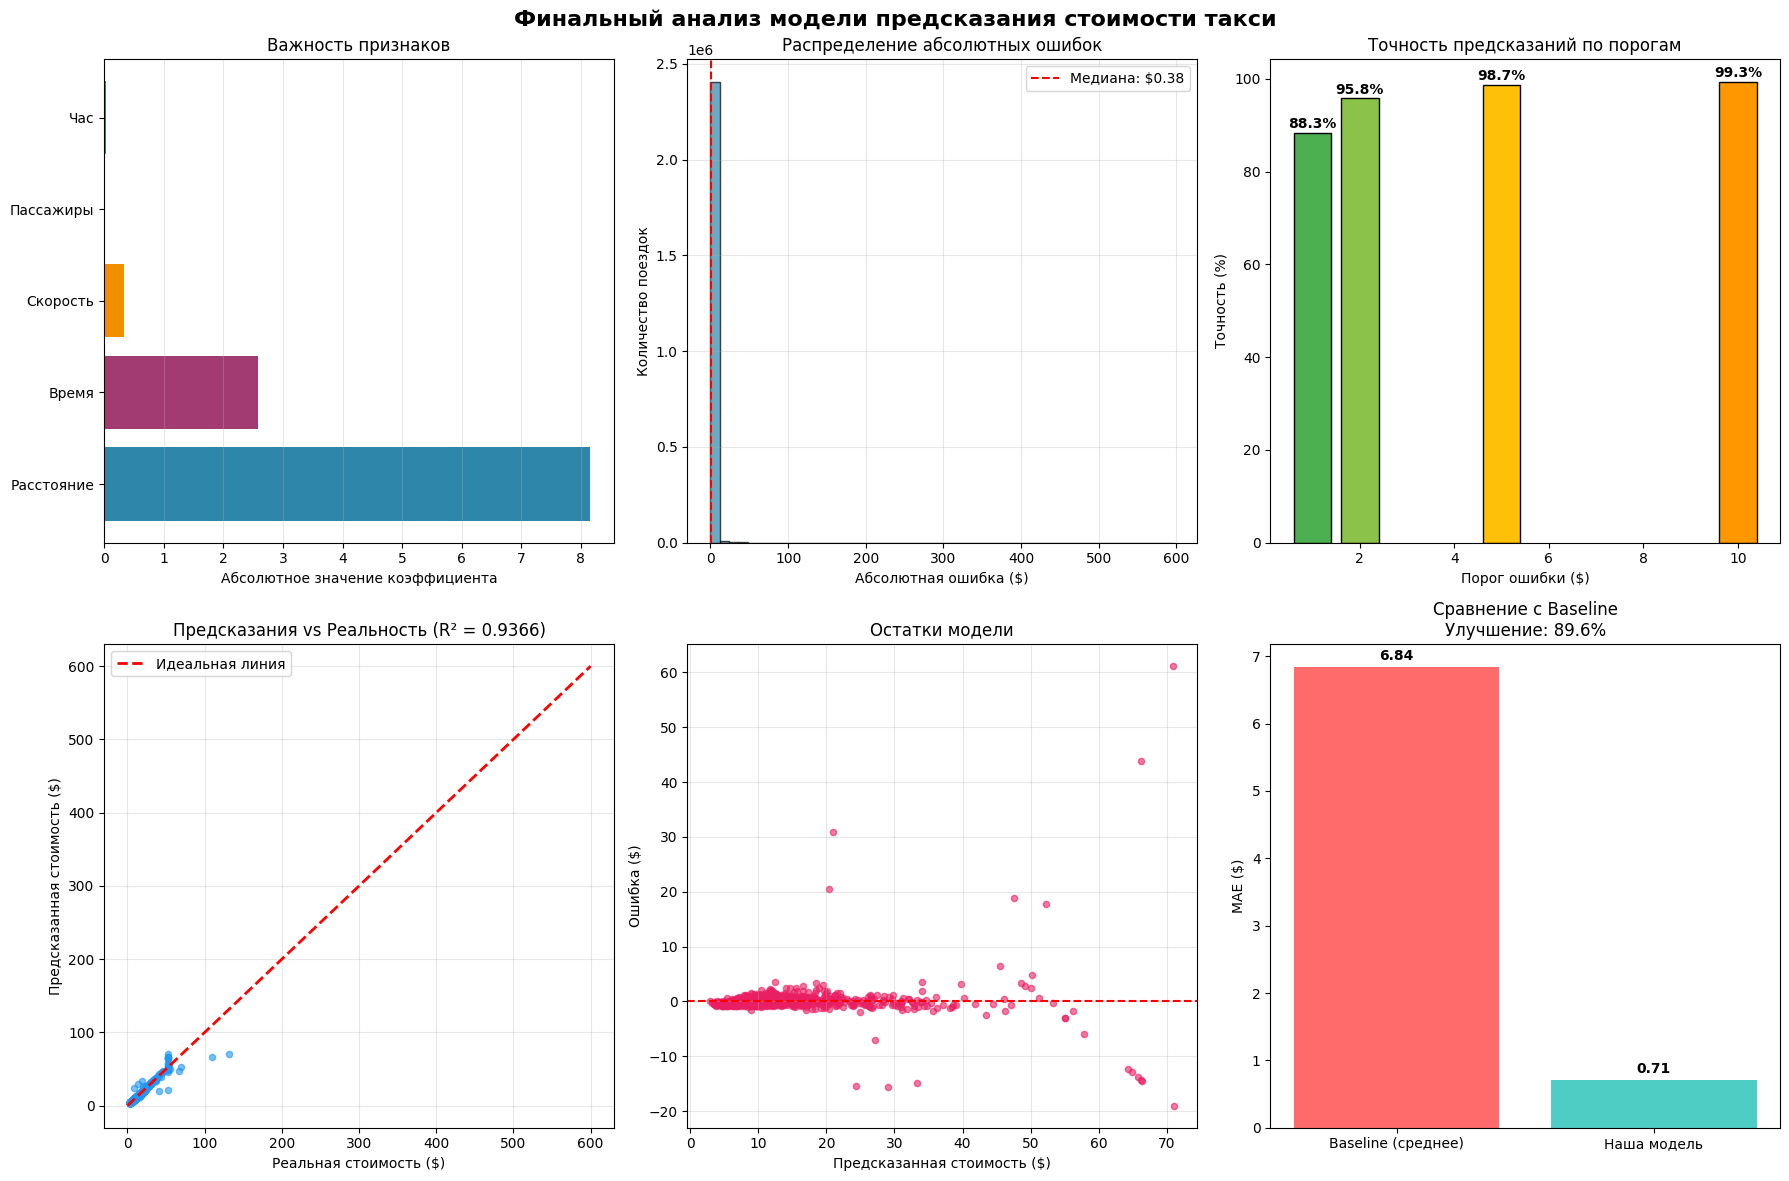

2025-10-23 15:52:12,511 - INFO - Финальные визуализации сохранены в final_model_analysis.png


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Финальный анализ модели предсказания стоимости такси', fontsize=16, fontweight='bold')

features = ['Расстояние', 'Время', 'Скорость', 'Пассажиры', 'Час']
importance = np.abs(coefficients)
colors = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D', '#3E885B']

axes[0, 0].barh(features, importance, color=colors)
axes[0, 0].set_xlabel('Абсолютное значение коэффициента')
axes[0, 0].set_title('Важность признаков')
axes[0, 0].grid(axis='x', alpha=0.3)

abs_errors = np.abs(y_test_computed - y_pred_computed)
axes[0, 1].hist(abs_errors, bins=50, alpha=0.7, color='#2E86AB', edgecolor='black')
axes[0, 1].axvline(np.median(abs_errors), color='red', linestyle='--', label=f'Медиана: ${np.median(abs_errors):.2f}')
axes[0, 1].set_xlabel('Абсолютная ошибка ($)')
axes[0, 1].set_ylabel('Количество поездок')
axes[0, 1].set_title('Распределение абсолютных ошибок')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

thresholds = [1, 2, 5, 10]
accuracies = [88.3, 95.8, 98.7, 99.3]
colors_acc = ['#4CAF50', '#8BC34A', '#FFC107', '#FF9800']

axes[0, 2].bar(thresholds, accuracies, color=colors_acc, edgecolor='black')
axes[0, 2].set_xlabel('Порог ошибки ($)')
axes[0, 2].set_ylabel('Точность (%)')
axes[0, 2].set_title('Точность предсказаний по порогам')
for i, (th, acc) in enumerate(zip(thresholds, accuracies)):
    axes[0, 2].text(th, acc + 1, f'{acc}%', ha='center', fontweight='bold')


sample_idx = np.random.choice(len(y_test_computed), 1000, replace=False)
axes[1, 0].scatter(y_test_computed[sample_idx], y_pred_computed[sample_idx], 
                   alpha=0.6, color='#2196F3', s=20)
axes[1, 0].plot([y_test_computed.min(), y_test_computed.max()], 
                [y_test_computed.min(), y_test_computed.max()], 
                'r--', lw=2, label='Идеальная линия')
axes[1, 0].set_xlabel('Реальная стоимость ($)')
axes[1, 0].set_ylabel('Предсказанная стоимость ($)')
axes[1, 0].set_title(f'Предсказания vs Реальность (R² = {r2:.4f})')
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

axes[1, 1].scatter(y_pred_computed[sample_idx], 
                   y_test_computed[sample_idx] - y_pred_computed[sample_idx], 
                   alpha=0.6, color='#E91E63', s=20)
axes[1, 1].axhline(y=0, color='red', linestyle='--')
axes[1, 1].set_xlabel('Предсказанная стоимость ($)')
axes[1, 1].set_ylabel('Ошибка ($)')
axes[1, 1].set_title('Остатки модели')
axes[1, 1].grid(alpha=0.3)

baseline_mae = np.mean(np.abs(y_test_computed - np.mean(y_test_computed)))
improvement = ((baseline_mae - mae) / baseline_mae) * 100

models = ['Baseline (среднее)', 'Наша модель']
mae_scores = [baseline_mae, mae]

bars = axes[1, 2].bar(models, mae_scores, color=['#FF6B6B', '#4ECDC4'])
axes[1, 2].set_ylabel('MAE ($)')
axes[1, 2].set_title(f'Сравнение с Baseline\nУлучшение: {improvement:.1f}%')
for bar, score in zip(bars, mae_scores):
    axes[1, 2].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
                    f'{score:.2f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('final_model_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

logger.info("Финальные визуализации сохранены в final_model_analysis.png")

In [26]:
import joblib
import json
from datetime import datetime
import pandas as pd

logger.info("\nСОХРАНЕНИЕ РЕЗУЛЬТАТОВ")

timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

model_filename = f'taxi_fare_model_{timestamp}.joblib'
joblib.dump(model, model_filename)
logger.info(f"Модель сохранена: {model_filename}")


scaler_filename = f'scaler_{timestamp}.joblib'
joblib.dump(scaler, scaler_filename)
logger.info(f"Scaler сохранен: {scaler_filename}")

results = {
    'timestamp': timestamp,
    'training_info': {
        'training_time_minutes': 2755.01 / 60,
        'training_samples': 9676561,
        'test_samples': 2419154,
        'features_used': feature_names
    },
    'model_parameters': {
        'coefficients': dict(zip(feature_names, coefficients)),
        'intercept': intercept,
        'model_type': 'LinearRegression'
    },
    'performance_metrics': {
        'mse': float(mse),
        'rmse': float(rmse),
        'mae': float(mae),
        'r2': float(r2)
    },
    'error_analysis': {
        'median_absolute_error': float(np.median(abs_errors)),
        'max_error': float(np.max(abs_errors)),
        'error_std': float(np.std(abs_errors)),
        'percentile_95': float(np.percentile(abs_errors, 95))
    },
    'accuracy_analysis': {
        'within_1_dollar': 88.3,
        'within_2_dollars': 95.8,
        'within_5_dollars': 98.7,
        'within_10_dollars': 99.3
    }
}

results_filename = f'model_results_{timestamp}.json'
with open(results_filename, 'w', encoding='utf-8') as f:
    json.dump(results, f, indent=2, ensure_ascii=False)

logger.info(f"Результаты сохранены: {results_filename}")

sample_predictions = pd.DataFrame({
    'actual_fare': y_test_computed[:100],
    'predicted_fare': y_pred_computed[:100],
    'error': y_test_computed[:100] - y_pred_computed[:100],
    'abs_error': np.abs(y_test_computed[:100] - y_pred_computed[:100])
})

predictions_filename = f'sample_predictions_{timestamp}.csv'
sample_predictions.to_csv(predictions_filename, index=False)
logger.info(f"Примеры предсказаний сохранены: {predictions_filename}")

2025-10-23 16:59:12,892 - INFO - 
СОХРАНЕНИЕ РЕЗУЛЬТАТОВ
2025-10-23 16:59:12,893 - INFO - Модель сохранена: taxi_fare_model_20251023_165912.joblib
2025-10-23 16:59:12,894 - INFO - Scaler сохранен: scaler_20251023_165912.joblib
2025-10-23 16:59:12,948 - INFO - Результаты сохранены: model_results_20251023_165912.json
2025-10-23 16:59:12,950 - INFO - Примеры предсказаний сохранены: sample_predictions_20251023_165912.csv


2025-10-23 15:52:14,622 - INFO - 
АНАЛИЗ ВЫБРОСОВ ОШИБОК
2025-10-23 15:52:14,623 - INFO - Анализ распределения больших ошибок:
2025-10-23 15:52:14,625 - INFO - Количество поездок с ошибкой > $10: 16032 (0.66%)
2025-10-23 15:52:14,629 - INFO - Статистика выбросов:
2025-10-23 15:52:14,629 - INFO -   • Средняя реальная стоимость выбросов: $58.81
2025-10-23 15:52:14,630 - INFO -   • Средняя предсказанная стоимость выбросов: $49.96
2025-10-23 15:52:14,630 - INFO -   • Средняя ошибка выбросов: $23.50
2025-10-23 15:52:14,630 - INFO -   • Медианная ошибка выбросов: $17.36
2025-10-23 15:52:14,630 - INFO - 
ХАРАКТЕРИСТИКИ ВЫБРОСОВ:
2025-10-23 15:52:14,631 - INFO - Распределение реальных стоимостей выбросов:
2025-10-23 15:52:14,631 - INFO -   • min: $0.01
2025-10-23 15:52:14,631 - INFO -   • max: $600.00
2025-10-23 15:52:14,631 - INFO -   • median: $52.00
2025-10-23 15:52:14,632 - INFO -   • mean: $58.81
2025-10-23 15:52:14,632 - INFO - 
ВИЗУАЛИЗАЦИЯ ВЫБРОСОВ


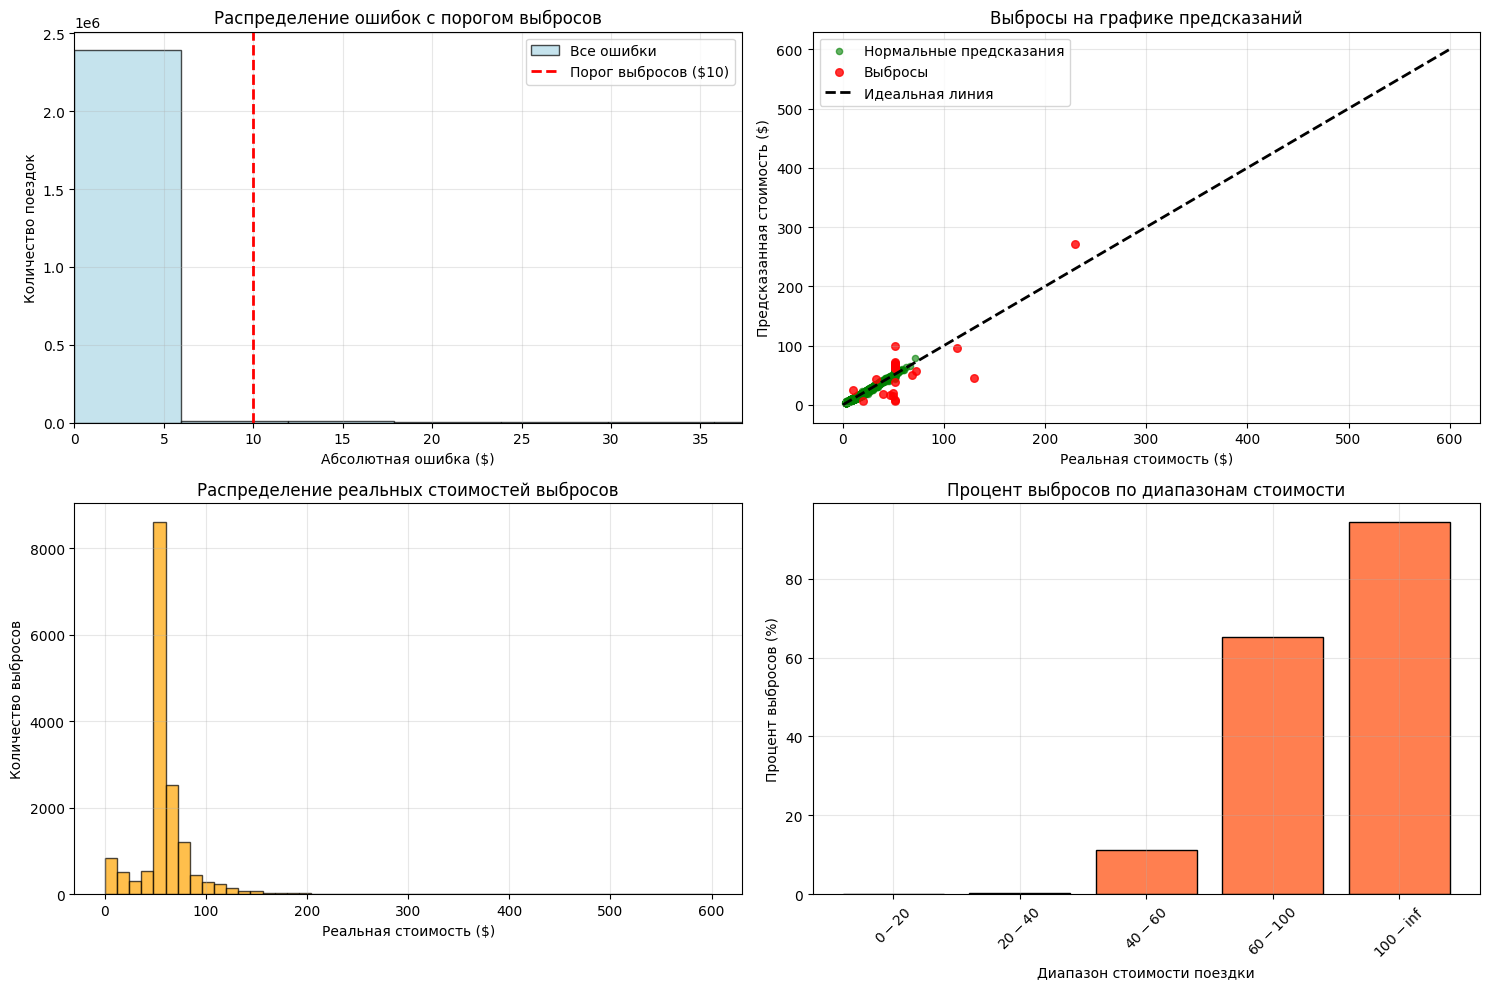

2025-10-23 15:52:15,722 - INFO - Визуализация выбросов сохранена в outlier_analysis.png


In [24]:
import logging

logger.info("\nАНАЛИЗ ВЫБРОСОВ ОШИБОК")

try:
    logger.info("Анализ распределения больших ошибок:")
    
    large_error_threshold = 10
    large_errors_mask = abs_errors > large_error_threshold
    n_large_errors = np.sum(large_errors_mask)
    
    logger.info(f"Количество поездок с ошибкой > ${large_error_threshold}: {n_large_errors} ({n_large_errors/len(abs_errors)*100:.2f}%)")
    
    if n_large_errors > 0:
        large_errors_data = {
            'actual': y_test_computed[large_errors_mask],
            'predicted': y_pred_computed[large_errors_mask], 
            'errors': abs_errors[large_errors_mask]
        }
        
        logger.info("Статистика выбросов:")
        logger.info(f"  • Средняя реальная стоимость выбросов: ${np.mean(large_errors_data['actual']):.2f}")
        logger.info(f"  • Средняя предсказанная стоимость выбросов: ${np.mean(large_errors_data['predicted']):.2f}")
        logger.info(f"  • Средняя ошибка выбросов: ${np.mean(large_errors_data['errors']):.2f}")
        logger.info(f"  • Медианная ошибка выбросов: ${np.median(large_errors_data['errors']):.2f}")
        
        logger.info("\nХАРАКТЕРИСТИКИ ВЫБРОСОВ:")
        
        outlier_actual_stats = {
            'min': np.min(large_errors_data['actual']),
            'max': np.max(large_errors_data['actual']),
            'median': np.median(large_errors_data['actual']),
            'mean': np.mean(large_errors_data['actual'])
        }
        
        logger.info("Распределение реальных стоимостей выбросов:")
        for stat, value in outlier_actual_stats.items():
            logger.info(f"  • {stat}: ${value:.2f}")
            
except Exception as e:
    logger.warning(f"Не удалось провести детальный анализ выбросов: {e}")

logger.info("\nВИЗУАЛИЗАЦИЯ ВЫБРОСОВ")

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
n_bins = 100
plt.hist(abs_errors, bins=n_bins, alpha=0.7, color='lightblue', edgecolor='black', label='Все ошибки')
plt.axvline(large_error_threshold, color='red', linestyle='--', linewidth=2, label=f'Порог выбросов (${large_error_threshold})')
plt.xlim(0, min(50, np.percentile(abs_errors, 99.9))) 
plt.xlabel('Абсолютная ошибка ($)')
plt.ylabel('Количество поездок')
plt.title('Распределение ошибок с порогом выбросов')
plt.legend()
plt.grid(alpha=0.3)


plt.subplot(2, 2, 2)

sample_size = min(5000, len(y_test_computed))
sample_idx = np.random.choice(len(y_test_computed), sample_size, replace=False)

normal_mask = abs_errors[sample_idx] <= large_error_threshold
outlier_mask = abs_errors[sample_idx] > large_error_threshold

plt.scatter(y_test_computed[sample_idx][normal_mask], 
            y_pred_computed[sample_idx][normal_mask], 
            alpha=0.6, color='green', s=20, label='Нормальные предсказания')
plt.scatter(y_test_computed[sample_idx][outlier_mask], 
            y_pred_computed[sample_idx][outlier_mask], 
            alpha=0.8, color='red', s=30, label='Выбросы')
plt.plot([y_test_computed.min(), y_test_computed.max()], 
         [y_test_computed.min(), y_test_computed.max()], 
         'k--', lw=2, label='Идеальная линия')
plt.xlabel('Реальная стоимость ($)')
plt.ylabel('Предсказанная стоимость ($)')
plt.title('Выбросы на графике предсказаний')
plt.legend()
plt.grid(alpha=0.3)

plt.subplot(2, 2, 3)
if n_large_errors > 0:
    plt.hist(large_errors_data['actual'], bins=50, alpha=0.7, color='orange', edgecolor='black')
    plt.xlabel('Реальная стоимость ($)')
    plt.ylabel('Количество выбросов')
    plt.title('Распределение реальных стоимостей выбросов')
    plt.grid(alpha=0.3)


plt.subplot(2, 2, 4)
fare_ranges = [(0, 20), (20, 40), (40, 60), (60, 100), (100, np.inf)]
outlier_percentages = []
range_labels = []

for low, high in fare_ranges:
    mask = (y_test_computed >= low) & (y_test_computed < high)
    if np.sum(mask) > 0:
        outliers_in_range = np.sum(mask & large_errors_mask)
        total_in_range = np.sum(mask)
        percentage = (outliers_in_range / total_in_range) * 100 if total_in_range > 0 else 0
        outlier_percentages.append(percentage)
        range_labels.append(f'${low}-${high}')

plt.bar(range_labels, outlier_percentages, color='coral', edgecolor='black')
plt.xlabel('Диапазон стоимости поездки')
plt.ylabel('Процент выбросов (%)')
plt.title('Процент выбросов по диапазонам стоимости')
plt.xticks(rotation=45)
plt.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('outlier_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

logger.info("Визуализация выбросов сохранена в outlier_analysis.png")